In [1]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
images = []
labels = []
train_path = '/content/drive/My Drive/datasetml/train'

for index, label in enumerate(['Closed', 'Open', 'no_yawn', 'yawn']):
    images_folder_path = os.path.join(train_path, label)
    for image_number in os.listdir(images_folder_path):
        image_path = os.path.join(images_folder_path, image_number)

        try:
            image = plt.imread(image_path)
            resized_image = cv2.resize(image, (150, 150))
            image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
            images.append(image)
            labels.append(index)
        except Exception:
            blank_image = np.zeros((150, 150), dtype=np.uint8)
            images.append(blank_image)
            labels.append(index)
images = np.array(images)
labels = np.array(labels)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Mounted at /content/drive
Images shape: (2900, 150, 150)
Labels shape: (2900,)


In [3]:
images = np.expand_dims(images, axis=-1)
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4,
                                                    shuffle=True, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5,
                                                shuffle=True, random_state=42)

y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)
print(f'Train set: {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_val.shape}, {y_val.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')


Train set: (1740, 150, 150, 1), (1740, 4)
Validation set: (580, 150, 150, 1), (580, 4)
Test set: (580, 150, 150, 1), (580, 4)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def random_contrast(image, lower=0.9, upper=1.1):
    return tf.image.random_contrast(image, lower=lower, upper=upper)

def custom_preprocess(image):
    image = random_contrast(image)
    return image
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.9, 1.1],
    preprocessing_function=custom_preprocess
)

val_test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_test_datagen.flow(x_val, y_val, batch_size=32)
test_generator = val_test_datagen.flow(x_test, y_test, batch_size=32)


In [5]:
input_shape = images.shape[1:]
print("Input shape:", input_shape)
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Input shape: (150, 150, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.3497 - loss: 1.3147 - val_accuracy: 0.7638 - val_loss: 0.6528
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7282 - loss: 0.6014 - val_accuracy: 0.7638 - val_loss: 0.4677
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7794 - loss: 0.4450 - val_accuracy: 0.8138 - val_loss: 0.4066
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7947 - loss: 0.4062 - val_accuracy: 0.7810 - val_loss: 0.4309
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7854 - loss: 0.4142 - val_accuracy: 0.8224 - val_loss: 0.3573
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8039 - loss: 0.3722 - val_accuracy: 0.8224 - val_loss: 0.3540
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8210 - loss: 0.3463 - val_accuracy: 0.8379 - val_loss: 0.3408
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8382 - loss: 0.3363 - val_accuracy: 0.8017 - val_lo

In [11]:

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f"Test Loss: {test_loss*100}")
print(f"Test Accuracy: {test_accuracy*100}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 821ms/step - accuracy: 0.9445 - loss: 0.1807
Test Loss: 21.23592346906662
Test Accuracy: 93.96551847457886


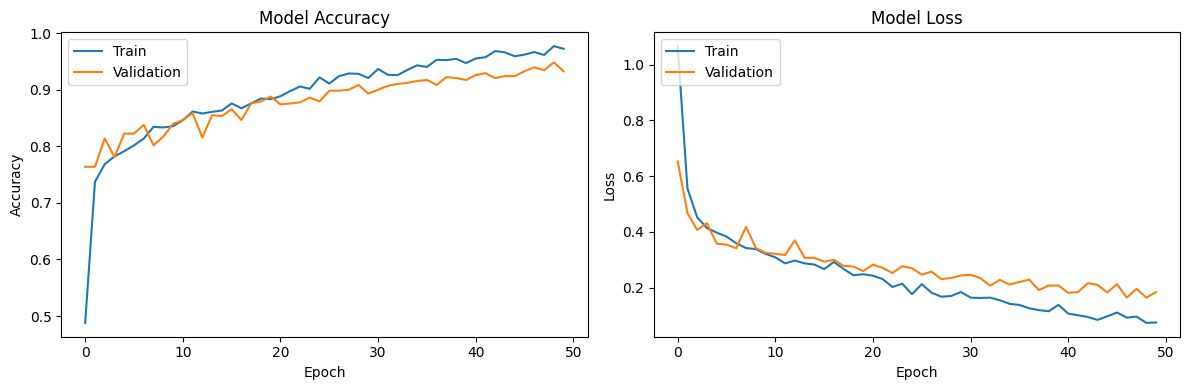

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


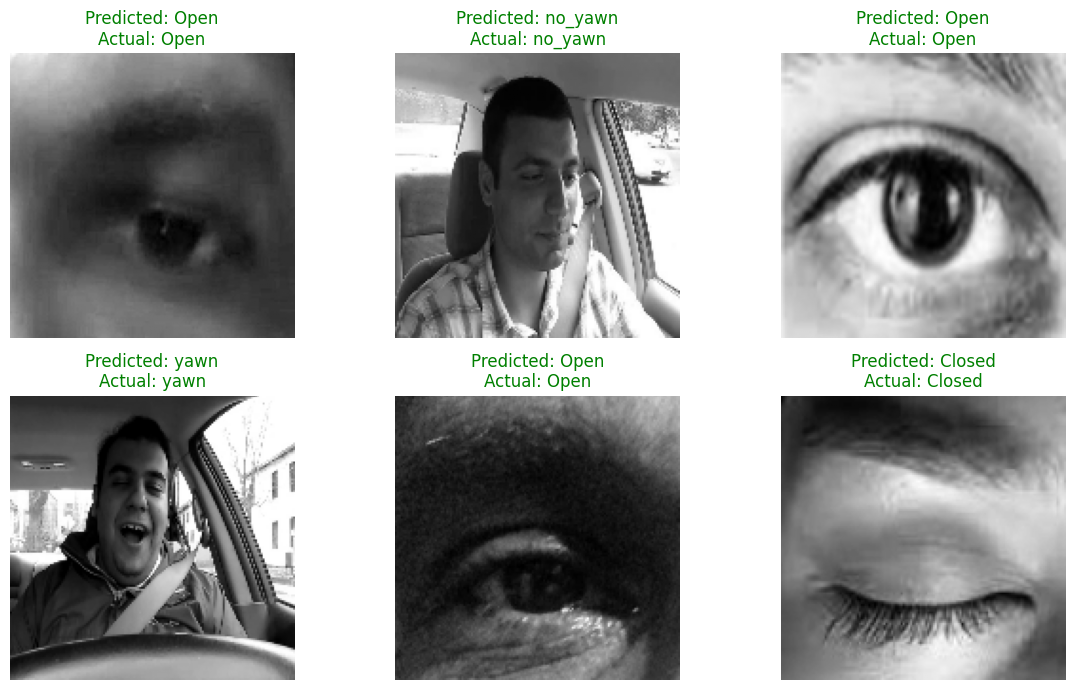

In [13]:
classes = {
    0: "Closed",
    1: "Open",
    2: "no_yawn",
    3: "yawn"
}

random_indices = random.sample(range(len(x_train)), 6)

def load_random_samples(images, indices):
    selected_images = [images[idx] for idx in indices]
    return np.array(selected_images)

random_samples = load_random_samples(x_train, random_indices)

predictions = model.predict(random_samples)

predicted_classes = np.argmax(predictions, axis=1)

actual_labels = np.argmax(y_train[random_indices], axis=1)

fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axs = axes.ravel()

for i in range(6):
    img = random_samples[i]
    prediction = predicted_classes[i]
    actual_label = actual_labels[i]

    axs[i].imshow(img.squeeze(), cmap='gray')

    col = 'green' if actual_label == prediction else 'red'
    axs[i].set_title(f'Predicted: {classes[prediction]}\nActual: {classes[actual_label]}', color=col)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
classes = {
    0: "Closed",
    1: "Open",
    2: "no_yawn",
    3: "yawn"
}

image_path = '/content/drive/My Drive/datasetml/train/Closed/_1.jpg'

image = plt.imread(image_path)

resized_image = cv2.resize(image, (150, 150))

gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

gray_image = np.expand_dims(gray_image, axis=-1)

gray_image = np.expand_dims(gray_image, axis=0)

predictions = model.predict(gray_image)

predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = classes[predicted_class]

print(f"Actual Class Closed")
print(f"Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Actual Class Closed
Predicted Class: Closed
